In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 資料來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。
 量測變數共 30 個，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。

In [4]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
df = pd.DataFrame(breast['data'], columns = breast['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.describe()

30

### 繪製變數間的相關係數圖，以觀察變數間是否存在相關性

<hr>

 從相關係數圖可以觀察，變數之間有相關性，`mean radius`、`mean perimeter`、`mean area`、`worst radius`、`worst perimeter`、`worst area`正相關係。

<Axes: >

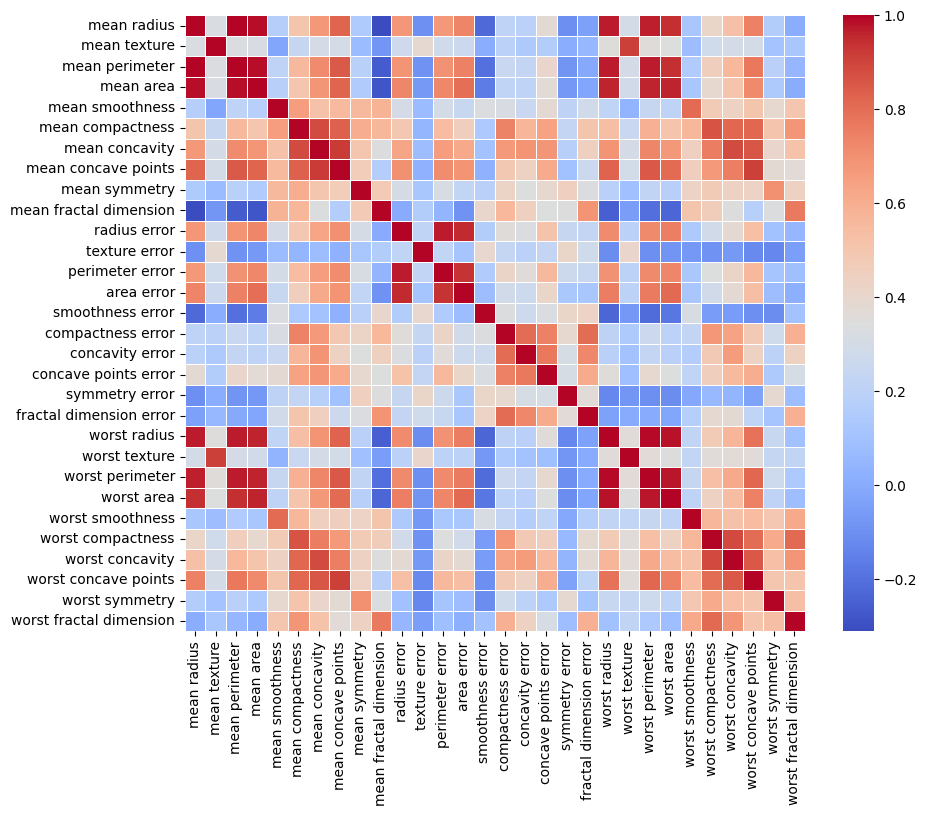

In [ ]:
corr =  df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = False, cmap = 'coolwarm', linewidths = 0.5)

### 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot)

<hr>

觀察每個變數的 Scaling，作為是否標準化的參考

從下方左圖可以觀察出未標準化前各項變數的全距差距大，並且`worst area`的數值與其他變數相差甚大，離群值也較多。

下方右圖可以觀察到標準化過後的變數平均數都在0附近，標準化後之變數不會因為變數間變異差距過大而對PCA造成影響。

In [19]:
def standard(X):
    return (X-X.mean())/X.std()

In [20]:
X = standard(df)

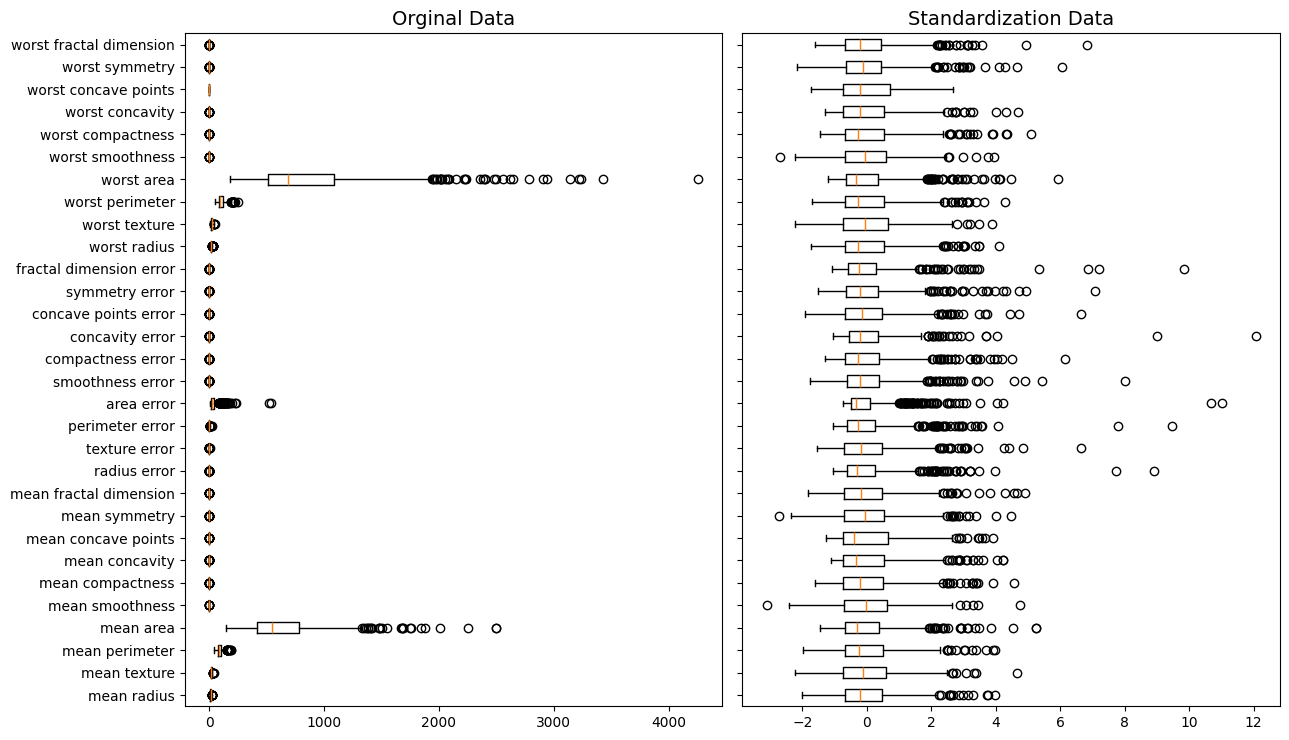

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(13,7.5), sharey='row')
axes[0].boxplot(df, vert = False)
axes[1].boxplot(X, vert = False)
axes[0].set_title('Orginal Data', fontsize=14)
axes[1].set_title('Standardization Data', fontsize=14)
plt.yticks(range(1, df.shape[1]+1), list(df.columns))
plt.tight_layout()
plt.show()

### 繪製特徵值由大而小的分布與 Scree Plot


使用原始資料進行PCA，觀察到以下2點：

從下方圖形可以發現，第1項成分就可以解釋 0.982 的原始變數，是不是可以推斷說，是受到數值大小的影響？

進一步觀察第1項成分的特徵向量，可以發現第1項成分基本上是由 worst area 與 mean area 所構成，也就是標準化前數值較大且變異較大的變數。



標準化後的特徵值

觀察標準化後之資料進行PCA的特徵值，從左方的Scree Plot可以看出在第8項主成分的特徵值開始有下降的趨勢，第1到7項成分合計就有9成的解釋能力，因此可以推斷說使用前七項主成份就足以解釋資料。


In [25]:
from sklearn.decomposition import PCA
pca_nostand = PCA(n_components=10).fit(df)

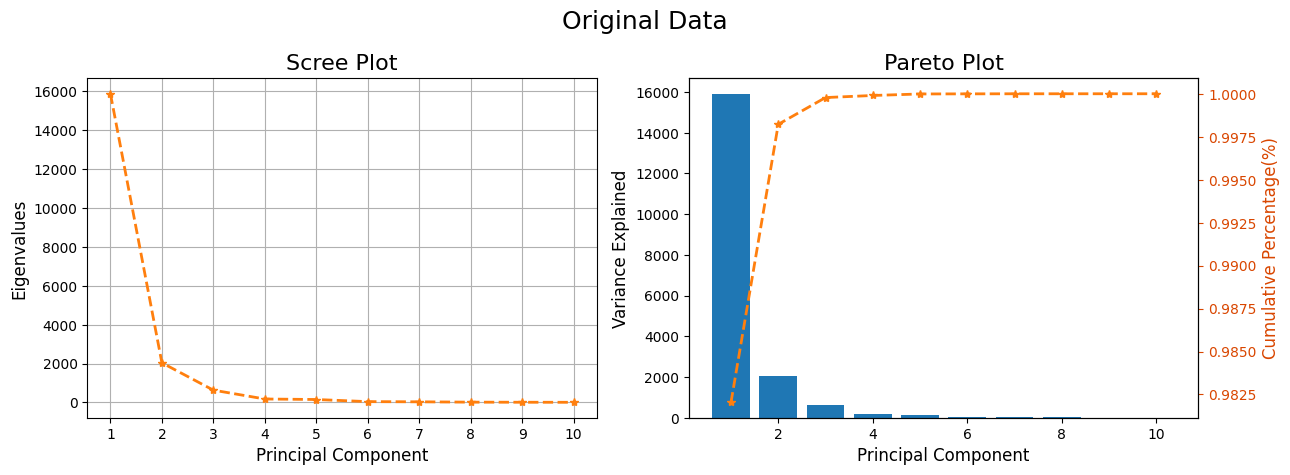

In [30]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 4.8))
x = np.arange(1,1 + len(pca_nostand.singular_values_))
axes[0].plot(x, pca_nostand.singular_values_, marker = '*', lw = 2, linestyle ='dashed', color='C1')
axes[0].set_xticks(x)
axes[0].set_xlabel('Principal Component', fontsize = 12)
axes[0].set_ylabel('Eigenvalues', fontsize = 12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize = 16)

axes[1].bar(x, pca_nostand.singular_values_)
ax2 = axes[1].twinx()
ax2.plot(x, pca_nostand.explained_variance_ratio_.cumsum(), marker='*', color='C1', lw=2, linestyle='dashed')
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Principal Component', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Original Data', fontsize=18)
plt.tight_layout()

In [31]:
pca = PCA(n_components = 10).fit(X)

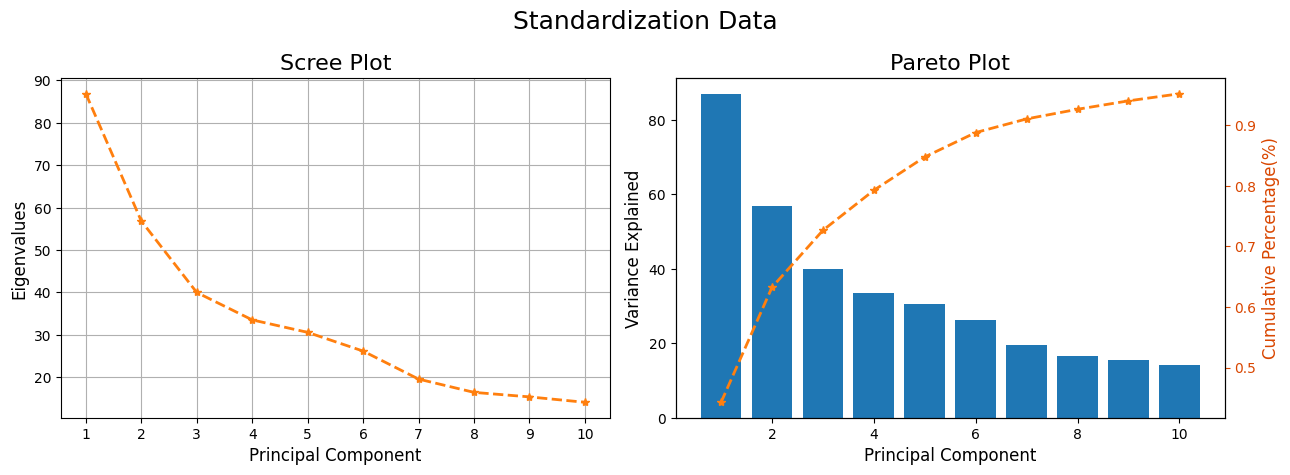

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(pca.singular_values_))
axes[0].plot(x, pca.singular_values_, marker = '*', lw = 2, linestyle ='dashed', color='C1')
axes[0].set_xticks(x)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, pca.singular_values_)
ax2 = axes[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum(), marker = '*', lw = 2, linestyle ='dashed', color='C1')
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Principal Component', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Standardization Data', fontsize=18)
plt.tight_layout()

### 利用PCA取得前兩項主成份，並繪製其散布圖

每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。

假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？

下圖為前兩項成分的散步圖，右方是使用有經過標準化的資料，且無標準化資料，散步圖數值相差甚大。

可以觀察到在不看標籤情況下，較無法從主成分散步圖中明顯觀察出兩個群組。

In [37]:
Z = pca.transform(X)
Z_nostand = pca_nostand.transform(df)

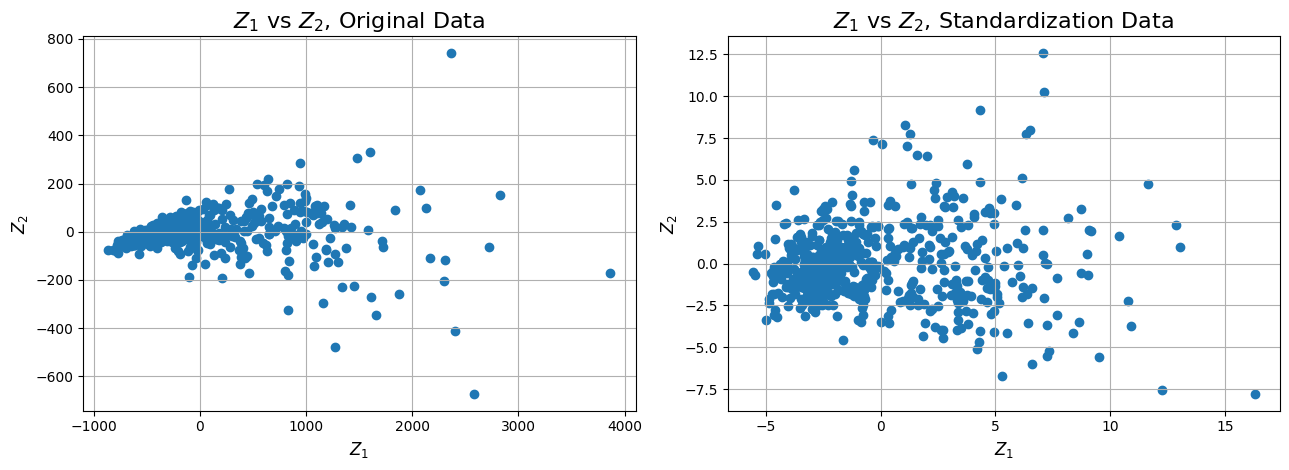

In [40]:
Z_dict = {0: Z_nostand, 1: Z}
titles = {
    0: r'$Z_1$ vs $Z_2$, Original Data', 
    1: r'$Z_1$ vs $Z_2$, Standardization Data'
}

fig, axes = plt.subplots(ncols=2, figsize=(13, 4.8))

for e, ax in enumerate(axes):
    drawdf = Z_dict[e]  
    ax.scatter(drawdf[:, 0], drawdf[:, 1], color='C0')
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
    ax.set_title(titles[e], fontsize=16)

plt.tight_layout()
plt.show()


### 根據每筆資料的標籤，塗上顏色

<hr>

根據每筆資料的標籤，塗上顏色後可以明顯發現，有標準化過可以觀察出大致群組的類別，而原始資料則有許多重疊的部分，較無法判讀資料的群組類別。

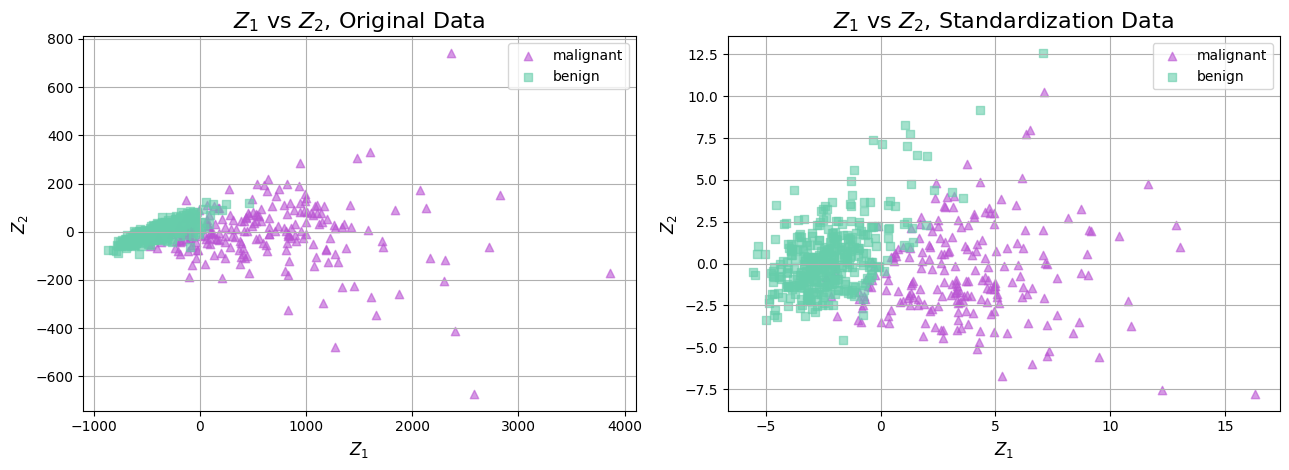

In [43]:
markerlst = ['^', 's'] 
colors = ['mediumorchid', 'mediumaquamarine']

fig, axes = plt.subplots(ncols=2, figsize=(13, 4.8))

Z_dict = {0: Z_nostand, 1: Z}
titles = {
    0: r'$Z_1$ vs $Z_2$, Original Data',
    1: r'$Z_1$ vs $Z_2$, Standardization Data'
}

for e, ax in enumerate(axes):
    drawdf = Z_dict[e] 
    
    for e2, group in enumerate(set(breast.get('target'))):
        filt = breast.get('target') == group
        ax.scatter(
            drawdf[filt, 0], drawdf[filt, 1], 
            label=breast.get('target_names')[group], 
            marker=markerlst[e2], alpha=0.6, color = colors[e2]
        )
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
    ax.legend()
    ax.set_title(titles[e], fontsize=16) 

plt.tight_layout()
plt.show()


### 採三個主成分，繪製立體圖

如果採三個主成分，則可繪製立體圖。觀察是否比2維的圖形具備更好的群組分辨能力。

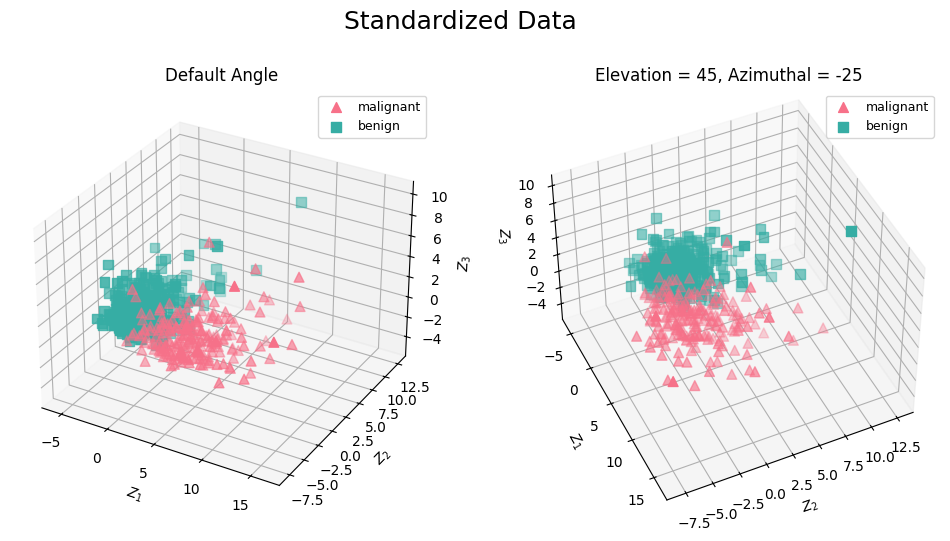

In [50]:

fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12,6))
markerlst = ['^', 's']
marker_size = 50
colors = sns.color_palette("husl", len(set(breast.get('target')))) 

titles = ['Default Angle', 'Elevation = 45, Azimuthal = -25']
angles = [(None, None), (45, -25)]

for ax, title, (elev, azim) in zip(axes, titles, angles):
    for e, (group, color) in enumerate(zip(sorted(set(breast.get('target'))), colors)):
        filt = breast.get('target') == group
        class_name = breast.get('target_names')[group]
        ax.scatter(Z[filt, 0], Z[filt, 1], Z[filt, 2], 
                   label = class_name, marker = markerlst[e], s = marker_size, color = color)
    
    ax.legend(fontsize=9)
    ax.set_xlabel(r'$Z_1$'); ax.set_ylabel(r'$Z_2$'); ax.set_zlabel(r'$Z_3$')
    ax.set_title(title)

    if elev is not None:
        ax.view_init(elev, azim)

fig.suptitle('Standardized Data', fontsize=18)
axes[1].zaxis.set_label_position('lower')  
axes[1].zaxis.set_ticks_position('lower') 

### 觀察 $Z_1$ 與 $Z_2$，發現哪個原變數比較重要？
$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如下式，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。
\begin{equation}
Z_1 = \mathbf{v}_1(1)X_1 + \mathbf{v}_1(2)X_2 + \cdots + \mathbf{v}_1(p)X_p
\end{equation}

<hr>

6項主成分與原變數之間的關聯：

- 第1項成分：有 concave points、concavity、area、radius 的 mean和worst
- 第2項成分：與 fractal dimension 有關的變數
- 第3項成分：和 error 有關的變數
- 第4項成分：3個與 texture 有關的變數
- 第5項成分：與 smoothness 有關的變數
- 第6項成分：與 smoothness、symmetry 有關的變數

In [51]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [52]:
cmap_o = plt.get_cmap('GnBu', 128)
newcolors = np.vstack((cmap_o(np.linspace(0.9, 0, 128)), cmap_o(np.linspace(0, 0.9, 128))))
newcmp = ListedColormap(newcolors, name='Purples_twoside')

In [58]:
comps = pca.components_.T.round(4)
cols = [f'PC {i}' for i in range(1, comps.shape[1]+1)]
indx = list(df.columns)
np_all = np.vstack((comps, pca.explained_variance_.reshape([1,-1]), pca.explained_variance_ratio_.reshape([1,-1])))
df_comps = pd.DataFrame(np_all, columns=cols, index= indx + ['Eigenvalues', 'Percentage of variance explained'])
styler = df_comps.style.format("{:.3f}")
for col in cols:
    vmax = abs(df_comps.loc[indx, col]).max()
    styler.background_gradient(subset=(indx, col), cmap=newcmp, axis=1, vmax=vmax, vmin=-vmax)

styler

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
mean radius,0.219,-0.234,-0.009,-0.041,-0.038,0.019,-0.124,-0.007,-0.223,0.096
mean texture,0.104,-0.060,0.065,0.603,0.050,-0.032,0.011,0.131,0.113,0.241
mean perimeter,0.228,-0.215,-0.009,-0.042,-0.037,0.017,-0.115,-0.019,-0.224,0.086
mean area,0.221,-0.231,0.029,-0.053,-0.010,-0.002,-0.052,0.035,-0.196,0.075
mean smoothness,0.143,0.186,-0.104,-0.159,0.365,-0.286,-0.141,-0.289,0.006,-0.069
mean compactness,0.239,0.152,-0.074,-0.032,-0.012,-0.014,0.031,-0.151,-0.168,0.013
mean concavity,0.258,0.060,0.003,-0.019,-0.086,-0.009,-0.107,-0.073,0.041,-0.136
mean concave points,0.261,-0.035,-0.026,-0.065,0.044,-0.052,-0.150,-0.152,-0.112,0.008
mean symmetry,0.138,0.190,-0.040,-0.067,0.306,0.356,-0.094,-0.232,0.256,0.572
mean fractal dimension,0.064,0.367,-0.023,-0.049,0.044,-0.119,0.296,-0.177,-0.124,0.081


下表為所有主成分的特徵向量，最後兩列分別為該成分的特徵值以及解釋原變數的比例，以下列舉出前 6 項成分中，重要的原變數，根據係數絕對值的大小排序：
- 第1項成分：mean concave points、mean concavity、worst concave points、mean compactness、worst perimeter、worst concavity、worst radius、mean perimeter
- 第2項成分：mean fractal dimension、fractal dimension error、worst fractal dimension
- 第3項成分：texture error、smoothness error、symmetry error、worst symmetry、radius error、perimeter error、worst smoothness
- 第4項成分：worst texture、mean texture、texture error
- 第5項成分：mean smoothness、concavity error、worst smoothness
- 第6項成分：worst symmetry、symmetry error、worst smoothness、mean symmetry、smoothness error、mean smoothness

![PCA-Plot](PCA-Plot.png)